### Change data to pkl

In [12]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

dataPath = "../../dataset1"

In [2]:
# pd. __version__

'1.4.1'

In [2]:
def load_data(dataPath):
    patients = OrderedDict()
    for patient in tqdm(os.listdir(dataPath)):
        df = pd.read_csv(dataPath + '/' + patient, sep='|')
        patients[patient[:-4]] = df
    return patients

patients = load_data(dataPath)

  0%|          | 0/40336 [00:00<?, ?it/s]

In [ ]:
with open('patients.pkl', 'wb') as f:
    pickle.dump(patients, f)

### Load pkl data

In [4]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

with open('patients.pkl', 'rb') as f:
    patients = pickle.load(f)

In [6]:
mergedData = pd.concat(list(patients.values()))

In [7]:
totalLen = mergedData.shape[0]

In [8]:
nans = []
values = []

for c in mergedData.columns:
    nans.append(100*mergedData[c].isnull().sum()/totalLen)
    values.append(100 - 100*mergedData[c].isnull().sum()/totalLen)

In [9]:
bar_label = mergedData.columns

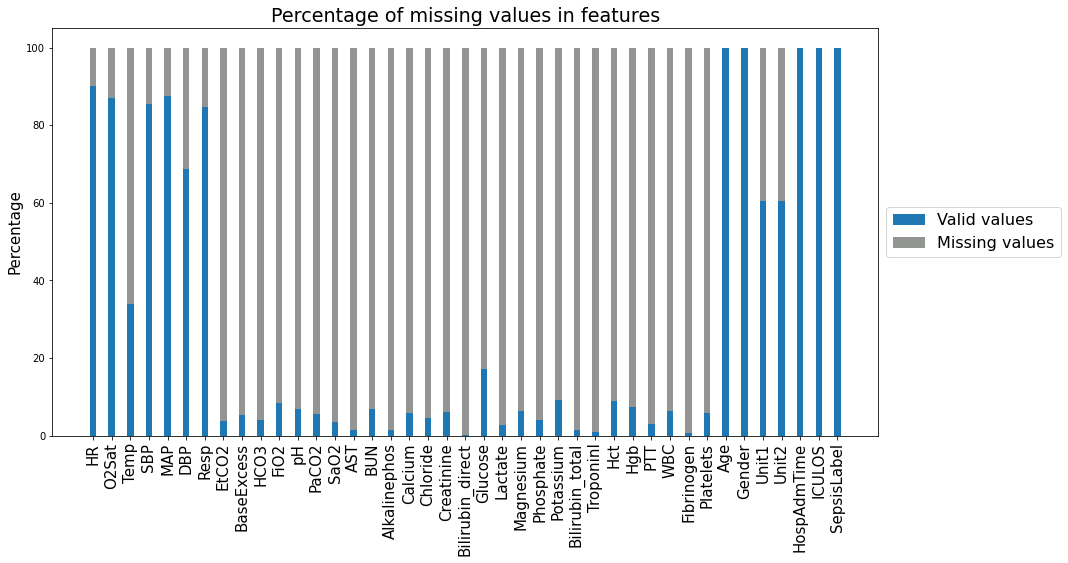

In [10]:
import matplotlib.pyplot as plt

labels = mergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### Get patients with sepsis

In [11]:
sepsisPatients = {}
nonSepsisPatients = {}

In [12]:
for pid, data in tqdm(patients.items()):
    if data['SepsisLabel'].sum() >= 1:
        sepsisPatients[pid] = data.iloc[:min(data[data['SepsisLabel'] == 1].index)-6]
    else:
        nonSepsisPatients[pid] = data

  0%|          | 0/40336 [00:00<?, ?it/s]

In [13]:
len(sepsisPatients), len(nonSepsisPatients)

(2932, 37404)

#### Check sepsis patients missing values

In [14]:
sepsisMergedData = pd.concat(list(sepsisPatients.values()))

In [15]:
sepsisTotalLen = sepsisMergedData.shape[0]

In [16]:
nans = []
values = []

for c in sepsisMergedData.columns:
    nans.append(100*sepsisMergedData[c].isnull().sum()/sepsisTotalLen)
    values.append(100 - 100*sepsisMergedData[c].isnull().sum()/sepsisTotalLen)

In [17]:
bar_label = sepsisMergedData.columns

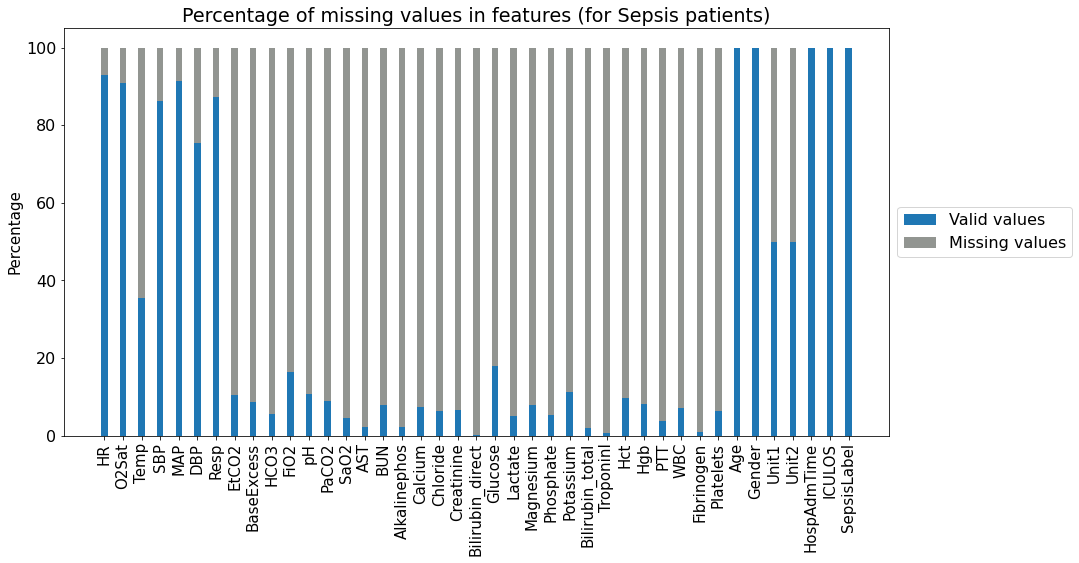

In [18]:
import matplotlib.pyplot as plt

labels = sepsisMergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features (for Sepsis patients)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

#### Check non-sepsis patients missing values

In [19]:
nonSepsisMergedData = pd.concat(list(nonSepsisPatients.values()))

In [20]:
nonSepsisTotalLen = nonSepsisMergedData.shape[0]

In [21]:
nans = []
values = []

for c in nonSepsisMergedData.columns:
    nans.append(100*nonSepsisMergedData[c].isnull().sum()/nonSepsisTotalLen)
    values.append(100 - 100*nonSepsisMergedData[c].isnull().sum()/nonSepsisTotalLen)

In [22]:
bar_label = nonSepsisMergedData.columns

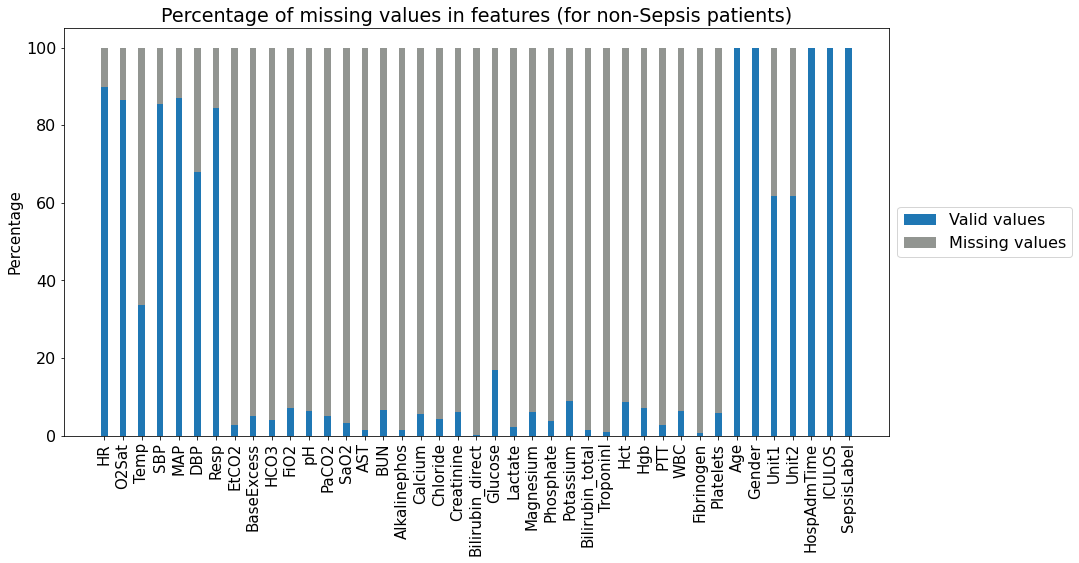

In [23]:
import matplotlib.pyplot as plt

labels = nonSepsisMergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features (for non-Sepsis patients)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### Filling missing values

#### Backward fill and forward fill

In [24]:
# Temporal data, missing completely at random
# First using last observation carried forward (LOCF) 
# and then Using next observation carried backward (NOCB)
sepsisPatients_partial_filled = {}
nonSepsisPatients_partial_filled = {}
for pid, data in tqdm(patients.items()):
    data = data.bfill().ffill()
    if data['SepsisLabel'].sum() >= 1:
        sepsisPatients_partial_filled[pid] = data.iloc[:min(data[data['SepsisLabel'] == 1].index)-6]
    else:
        nonSepsisPatients_partial_filled[pid] = data

  0%|          | 0/40336 [00:00<?, ?it/s]

In [25]:
len(sepsisPatients), len(nonSepsisPatients)

(2932, 37404)

#### Filling with median

In [26]:
# For the data completely missing for the patient, using the median across Sepsis/non-Sepsis patients
merged_sepsis_partial_filled = pd.concat(list(sepsisPatients_partial_filled.values()))
merged_nonsepsis_partial_filled = pd.concat(list(nonSepsisPatients_partial_filled.values()))

In [27]:
sepsis_filled = {}
sepsis_median = merged_sepsis_partial_filled.median()
for pid, data in sepsisPatients_partial_filled.items():
    data = data.fillna(sepsis_median)
    sepsis_filled[pid] = data

In [ ]:
nonsepsis_filled = {}
nonsepsis_median = merged_nonsepsis_partial_filled.median()
for pid, data in nonSepsisPatients_partial_filled.items():
    data = data.fillna(nonsepsis_median)
    nonsepsis_filled[pid] = data

#### Save filled data as pkl

In [4]:
with open('sepsis_filled.pkl', 'wb') as f:
    pickle.dump(sepsis_filled, f)
    
with open('nonsepsis_filled.pkl', 'wb') as f:
    pickle.dump(nonsepsis_filled, f)

NameError: name 'sepsis_filled' is not defined

In [10]:
sepsis_filled = pd.read_pickle('sepsis_filled.pkl')
nonsepsis_filled = pd.read_pickle('nonsepsis_filled.pkl')

In [11]:
sepsis_pred_filled = {}
nonsepsis_pred_filled = {}
for pid, data in sepsis_filled.items():
    sepsis_pred_filled[pid] = data.mean()

for pid, data in nonsepsis_filled.items():
    nonsepsis_pred_filled[pid] = data.mean()

In [13]:
merged_train_mat_sepsis = pd.concat(list(sepsis_pred_filled.values()), axis=1).transpose()
merged_train_mat_sepsis

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,112.710744,98.010331,37.711777,118.663223,80.241736,65.169421,24.381198,32.000000,2.508264,28.128099,...,10.985124,669.960744,273.971074,27.92,1.0,1.0,0.0,-0.03,121.5,0.000000
1,83.666667,100.000000,37.706667,133.833333,87.888889,64.888889,15.194444,32.000000,0.333333,23.916667,...,11.022222,325.000000,193.500000,65.79,1.0,1.0,0.0,-0.02,10.5,0.000000
2,87.678571,98.000000,36.789286,119.464286,90.190000,73.250000,10.857143,32.000000,-8.571429,17.142857,...,16.971429,325.000000,105.571429,58.54,0.0,1.0,0.0,-405.34,7.5,0.642857
3,95.823529,97.819328,38.267563,150.663866,76.819328,67.563025,19.231092,32.000000,4.168067,27.705882,...,12.897479,325.000000,645.957983,39.28,1.0,1.0,0.0,-0.02,60.0,0.000000
4,78.333333,99.833333,37.000000,123.333333,74.166667,49.833333,16.333333,32.000000,-3.000000,22.333333,...,21.833333,325.000000,148.000000,77.26,0.0,0.0,1.0,-135.81,6.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,106.437500,100.000000,36.275000,152.375000,110.625000,83.312500,25.187500,32.000000,0.000000,25.000000,...,11.200000,325.000000,184.000000,69.00,1.0,1.0,0.0,-339.52,4.5,0.750000
2928,89.542857,98.385714,37.745714,109.857143,76.442857,61.314286,21.257143,29.885714,0.000000,25.000000,...,11.762857,240.000000,50.571429,76.00,0.0,0.0,1.0,-8.34,19.0,0.000000
2929,108.557692,97.596154,36.644231,108.846154,74.000000,68.076923,20.269231,32.000000,0.000000,25.000000,...,5.276923,325.000000,162.269231,71.00,0.0,1.0,0.0,-0.75,28.5,0.000000
2930,92.021053,94.389474,37.330000,141.784211,78.126316,44.063158,20.115789,31.068421,0.000000,25.000000,...,13.263158,286.673684,74.652632,69.00,0.0,0.0,1.0,-87.88,54.0,0.000000


In [14]:
merged_train_mat_sepsis = pd.concat(list(sepsis_pred_filled.values()), axis=1).transpose()
merged_train_mat_nonsepsis = pd.concat(list(nonsepsis_pred_filled.values()), axis=1).transpose()
train_mat = pd.concat([merged_train_mat_sepsis, merged_train_mat_nonsepsis])

In [15]:
# 40000 rows * 41 columns
train_mat

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,112.710744,98.010331,37.711777,118.663223,80.241736,65.169421,24.381198,32.0,2.508264,28.128099,...,10.985124,669.960744,273.971074,27.92,1.0,1.0,0.0,-0.03,121.5,0.000000
1,83.666667,100.000000,37.706667,133.833333,87.888889,64.888889,15.194444,32.0,0.333333,23.916667,...,11.022222,325.000000,193.500000,65.79,1.0,1.0,0.0,-0.02,10.5,0.000000
2,87.678571,98.000000,36.789286,119.464286,90.190000,73.250000,10.857143,32.0,-8.571429,17.142857,...,16.971429,325.000000,105.571429,58.54,0.0,1.0,0.0,-405.34,7.5,0.642857
3,95.823529,97.819328,38.267563,150.663866,76.819328,67.563025,19.231092,32.0,4.168067,27.705882,...,12.897479,325.000000,645.957983,39.28,1.0,1.0,0.0,-0.02,60.0,0.000000
4,78.333333,99.833333,37.000000,123.333333,74.166667,49.833333,16.333333,32.0,-3.000000,22.333333,...,21.833333,325.000000,148.000000,77.26,0.0,0.0,1.0,-135.81,6.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37399,89.145833,98.125000,36.427083,130.385417,83.927083,72.135417,19.666667,34.0,0.000000,25.000000,...,12.600000,271.000000,238.000000,84.00,0.0,0.0,1.0,-6.69,24.5,0.000000
37400,61.660000,96.800000,37.140000,119.500000,90.460000,70.160000,19.960000,45.0,0.000000,25.000000,...,10.064000,271.000000,178.920000,30.00,1.0,0.0,1.0,-0.02,13.0,0.000000
37401,81.265306,96.500000,36.675510,157.969388,116.387755,88.836735,20.142857,34.0,0.000000,25.000000,...,11.340816,271.000000,184.775510,60.00,0.0,1.0,0.0,-53.64,25.0,0.000000
37402,94.050000,93.250000,37.620000,141.900000,100.700000,74.300000,21.450000,34.0,0.000000,25.000000,...,10.350000,271.000000,267.750000,84.00,0.0,1.0,0.0,-10.74,10.5,0.000000


#### Normalization

In [19]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

sepsis_filled = pd.read_pickle('sepsis_filled.pkl')
nonsepsis_filled = pd.read_pickle('nonsepsis_filled.pkl')

In [4]:
merged_sepsis_filled = pd.concat(list(sepsis_filled.values())) # !
merged_nonsepsis_filled = pd.concat(list(nonsepsis_filled.values())) #!

In [22]:
merged_sepsis_filled = merged_sepsis_filled.drop(columns=['Gender', 'Unit1', 'Unit2','HospAdmTime', 'ICULOS', 'SepsisLabel'], inplace = True)
merged_nonsepsis_filled = merged_nonsepsis_filled.drop(columns=['Gender', 'Unit1', 'Unit2','HospAdmTime', 'ICULOS', 'SepsisLabel'], inplace= True)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age'],
      dtype='object')

In [25]:
merged_sepsis_min = merged_sepsis_filled.min(axis=0)
merged_sepsis_max = merged_sepsis_filled.max(axis=0)

In [28]:
norm_sepsis = {}
for pid, data in sepsis_filled.items(): #!
    norm_data = (data - merged_sepsis_min)/(merged_sepsis_max - merged_sepsis_min)
    norm_data.drop(columns=['Gender', 'Unit1', 'Unit2','HospAdmTime', 'ICULOS', 'SepsisLabel'], inplace = True)
    norm_sepsis[pid] = norm_data

In [33]:
# print(norm_sepsis["p000009"].head())
"""
merged_norm_sepsis = pd.concat(list(norm_sepsis.values()))
test_min = merged_norm_sepsis.min(axis = 0)
test_max = merged_norm_sepsis.max(axis = 0)
print(test_min, test_max) # all features are now between [0,1]
"""

'\nmerged_norm_sepsis = pd.concat(list(norm_sepsis.values()))\ntest_min = merged_norm_sepsis.min(axis = 0)\ntest_max = merged_norm_sepsis.max(axis = 0)\nprint(test_min, test_max) # all features are now between [0,1]\n'

In [30]:
merged_nonsepsis_min = merged_nonsepsis_filled.min(axis=0)
merged_nonsepsis_max = merged_nonsepsis_filled.max(axis=0)
norm_nonsepsis = {}
#  nonsepsis_filled
"""
for column in merged_nonsepsis_filled:
    print(merged_nonsepsis_filled[column].isnull().values.any())
"""

'\nfor column in merged_nonsepsis_filled:\n    print(merged_nonsepsis_filled[column].isnull().values.any())\n'

In [31]:
for pid, data in nonsepsis_filled.items(): # !
    norm_data = (data - merged_nonsepsis_min)/(merged_nonsepsis_max - merged_nonsepsis_min)
    norm_data.drop(columns=['Gender', 'Unit1', 'Unit2','HospAdmTime', 'ICULOS', 'SepsisLabel'], inplace = True)
    norm_nonsepsis[pid] = norm_data

In [35]:
# print(norm_nonsepsis["p000001"])
"""
merged_norm_nonsepsis = pd.concat(list(norm_nonsepsis.values()))
test_min = merged_norm_nonsepsis.min(axis = 0)
test_max = merged_norm_nonsepsis.max(axis = 0)
print(test_min, test_max) # all features are now between [0,1]
"""

AST                 0.0
Age                 0.0
Alkalinephos        0.0
BUN                 0.0
BaseExcess          0.0
Bilirubin_direct    0.0
Bilirubin_total     0.0
Calcium             0.0
Chloride            0.0
Creatinine          0.0
DBP                 0.0
EtCO2               0.0
FiO2                0.0
Fibrinogen          0.0
Glucose             0.0
HCO3                0.0
HR                  0.0
Hct                 0.0
Hgb                 0.0
Lactate             0.0
MAP                 0.0
Magnesium           0.0
O2Sat               0.0
PTT                 0.0
PaCO2               0.0
Phosphate           0.0
Platelets           0.0
Potassium           0.0
Resp                0.0
SBP                 0.0
SaO2                0.0
Temp                0.0
TroponinI           0.0
WBC                 0.0
pH                  0.0
dtype: float64 AST                 1.0
Age                 1.0
Alkalinephos        1.0
BUN                 1.0
BaseExcess          1.0
Bilirubin_direct    1.0
B